# Query environment

In [ ]:
#Be aware of your Jupyter environment stack:
display(Base.load_path())

# Setup environment

In [3]:
using RSDeltaSigmaPort
j=im
:READY

:READY

# Discrete-Time Simulation

Starting simulation...
	done.
Ploting modulator signals...


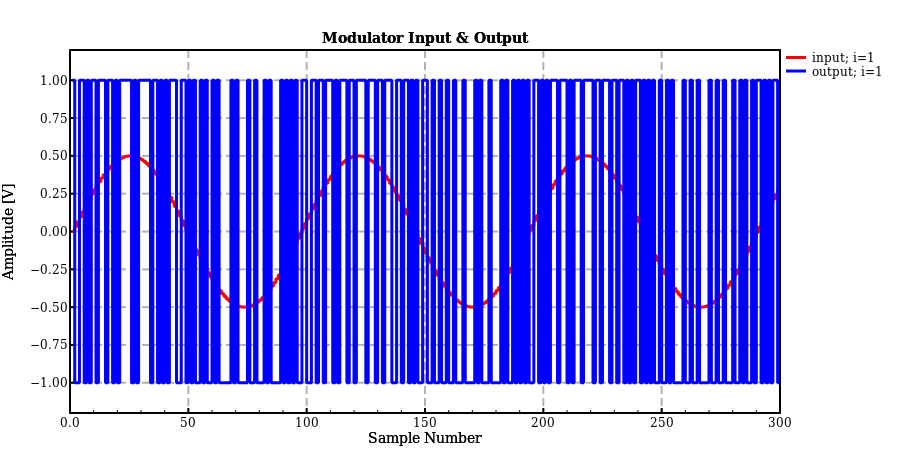

Plotting spectrum of modulator output, v...


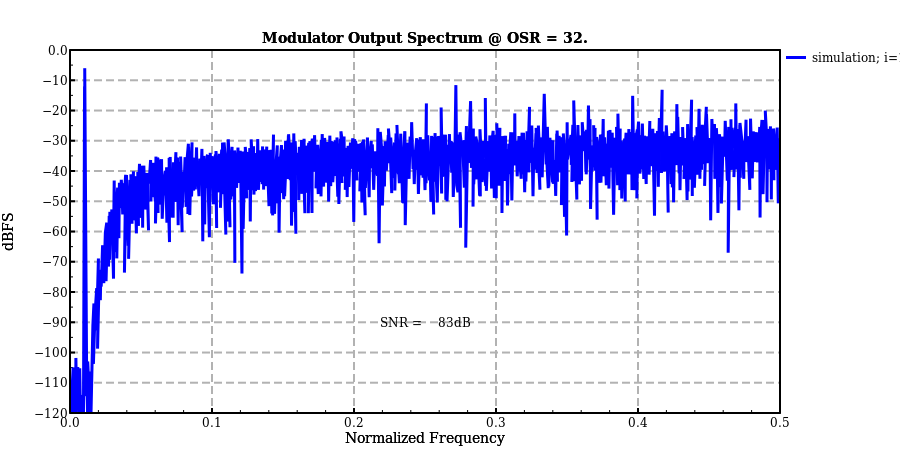

In [2]:
OSR = 32
N = 8192
NTF = synthesizeNTF(5, OSR, opt=1)
fB = ceil(N/(2*OSR)); ftest=floor(2/3*fB)
u = 0.5*sin.(2π*ftest/N*collect(0:N-1)) # half-scale sine-wave input

println("Starting simulation..."); flush(stdout); flush(stderr)
v,xn,xmax,y = simulateDSM(u,NTF)
println("\tdone.")

println("Ploting modulator signals..."); flush(stdout); flush(stderr)
plot = plotModTransient(u, v, y)
inlinedisp(plot, AR=2/1)

println("Plotting spectrum of modulator output, v..."); flush(stdout); flush(stderr)
plot = RSDeltaSigmaPort.plotModSpectrum(v, NTF, Int(fB), Int(ftest-2),
	title="Modulator Output Spectrum @ OSR = $OSR."
)
inlinedisp(plot, AR=2/1)

# DONE